# QF 627 Programming and Computational Finance
## Problem-Sets for Exercise `6` | `Questions`

> Hi, Team 👋

> The purpose of the current exercise problem sets is to consolidate and expand the understanding of algorithmic trading tool kits that you have developed in the course.

> Building on what you have learned thus far, these problem sets will ask you to create trading strategies, capitalizing on commonly used technical indicators.

> Please submit your answers via the submission portal at eLearn. Again, it would be a good practice to attempt to answer these questions within the designated time limit.

> As with the previous exercise problem sets, the questions are written in such a way that helps advance your learning, rather than testing you.

> Enjoy🤞

### For standardization of your answers…

> Please execute the lines of code below before you start work on your answers.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl

from pandas_datareader import data as pdr

import datetime as dt
import yfinance as yf

> Let's set some print option.

In [2]:
np.set_printoptions(precision = 3)

plt.style.use("ggplot")

mpl.rcParams["axes.grid"] = True
mpl.rcParams["grid.color"] = "grey"
mpl.rcParams["grid.alpha"] = 0.25

mpl.rcParams["axes.facecolor"] = "white"

mpl.rcParams["legend.fontsize"] = 14

In [3]:
import pandas_datareader.data as web
from pandas_datareader import data as pdr

import yfinance as yf

(
    yf
    .pdr_override()
)

import matplotlib.gridspec as gridspec
import warnings
warnings.filterwarnings('ignore')

## 👇 Questions 1 to 4 ask you to build, execute, and backtest a strategy based on one kind of momentum strategy called the `Moving Average Convergence Divergence` (MACD) crossover.

### <font color = blue> 👉 Question 1</font>. Let’s take a look at Apple (AAPL) as our security of interest, over the three-year period of 2015 through 2017.

#### Moving Average Convergence Divergence (`MACD`) is a lagging, trend-following momentum indicator reflecting the relationship between two moving averages of stock prices.

#### The strategy utilizes two indicators, the MACD and the MACD signal line:

- The MACD is defined as the `difference` between the `12`-day ***exponential*** moving average and the `26`-day exponential moving average.
- The MACD signal line is then defined as the `9`-day ***exponential*** moving average of the MACD.

### <font color = green> NOTE: The MACD crossover strategy is defined as:

- A `bullish` crossover arises when the MACD line turns `upward and crosses` beyond the MACD signal line.
- A `bearish` crossover arises when the MACD line turns `downward and crosses` under the MACD signal line.

### Visualize your buy and sell positions.

### Below are the lines of code that lead to an answer:

In [4]:
start =\
 (
     dt
     .date(2015, 1, 1)
 )

end =\
 (
    dt
     .date(2017, 12, 31)
 )

short = 12
long = 26
sig = 9

In [5]:
AAPL =\
    pdr.get_data_yahoo('AAPL',
                       start,
                       end
                      )
AAPL

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,27.847500,27.860001,26.837500,27.332500,24.498682,212818400
2015-01-05,27.072500,27.162500,26.352501,26.562500,23.808512,257142000
2015-01-06,26.635000,26.857500,26.157499,26.565001,23.810762,263188400
2015-01-07,26.799999,27.049999,26.674999,26.937500,24.144634,160423600
2015-01-08,27.307501,28.037500,27.174999,27.972500,25.072323,237458000
...,...,...,...,...,...,...
2017-12-22,43.669998,43.855000,43.625000,43.752499,41.427494,65397600
2017-12-26,42.700001,42.867500,42.419998,42.642502,40.376476,132742000
2017-12-27,42.525002,42.695000,42.427502,42.650002,40.383583,85992800


In [6]:
aapl =\
(
    AAPL[['Adj Close']]
    )
aapl['shorter_EMA'] =\
    (aapl[['Adj Close']]
     .ewm(span=short,
           min_periods=short)
     .mean()
    )
aapl['longer_EMA'] =\
    (aapl[['Adj Close']]
     .ewm(span=long,
          min_periods=long)
     .mean()
    )
aapl['MACD'] =\
(    aapl['shorter_EMA'] - aapl['longer_EMA']
)
aapl["sig_line"] =\
    (aapl[['MACD']]
     .ewm(span=sig,
          min_periods=sig)
     .mean()
    )
aapl =\
    aapl.dropna()

#### Positions Calculation:
- If MACD is greater than the Signal line, you take a position of 1 (indicating a potential Buy).
- If MACD is below the Signal line, you take a position of 0 (indicating a potential Sell or no action).

####　BUY_or_SELL Column: This column will indicate actual Buy/Sell actions.
- A difference of 1 (0 to 1) means a Buy signal.
- A difference of -1 (1 to 0) means a Sell signal.
- A difference of 0 means no action.

In [7]:
aapl["Positions"] = 0.0
aapl["Positions"]=\
(   np.where(aapl['MACD']>aapl['sig_line'],
             1.0,
             0.0
            )
)
aapl["BUY_or_SELL"] =\
(    aapl["Positions"]
     .diff()
)


In [8]:
aapl['BUY_or_SELL'].value_counts()

BUY_or_SELL
 0.0    678
-1.0     22
 1.0     21
Name: count, dtype: int64

### <font color = red> Answer 1 is presented in the cell below: </font>

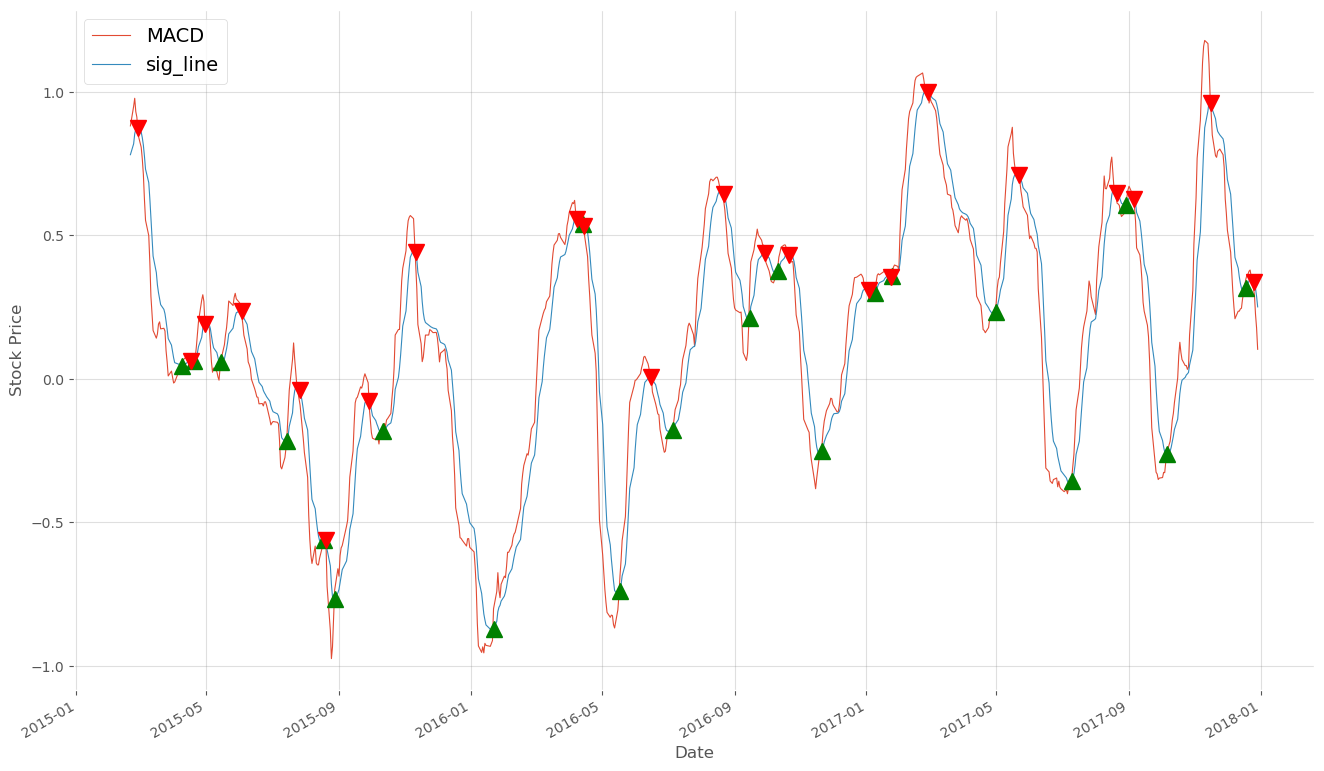

In [9]:
fig =\
    (plt
     .figure(figsize = [16, 10]
            )
    )

sub =\
(    fig
    .add_subplot(111,
                 ylabel = "Stock Price")
)


(aapl[["MACD",
       "sig_line"]]
                     .plot(ax = sub,
                           style = ["-", "-"],
                           lw = 0.80
                           )
)

# Buy

(
    sub
    .plot(aapl.loc[aapl.BUY_or_SELL == 1.0].index,
          aapl.sig_line[aapl.BUY_or_SELL == 1.0],
          "^",
          color = "green",
          markersize = 12)

)

# Sell

(
    sub
    .plot(aapl.loc[aapl.BUY_or_SELL == -1.0].index,
          aapl.sig_line[aapl.BUY_or_SELL == -1.0],
          "v",
          color = "red",
          markersize = 12)
)

plt.show()

### <font color = blue> 👉 Question 2</font>. Let’s suppose that you started from a $100,000 capital base for the given security.

### Given a $5 fixed commission fee per trade, how much in cumulative returns could you have had as a result of the MACD crossover strategy?

### Below are the lines of code that lead to an answer:

In [10]:
aapl.head(60)

,Adj Close,shorter_EMA,longer_EMA,MACD,sig_line,Positions,BUY_or_SELL
Date,,,,,,,
2015-02-20,29.132904,28.076635,27.195588,0.881047,0.780722,1.0,NaN
2015-02-23,29.920279,28.361094,27.412057,0.949037,0.818434,1.0,0.0
2015-02-24,29.733564,28.572761,27.595509,0.977251,0.853182,1.0,0.0
2015-02-25,28.973181,28.634492,27.703841,0.930651,0.869819,1.0,0.0
2015-02-26,29.339872,28.743202,27.831904,0.911298,0.878598,1.0,0.0
2015-02-27,28.898943,28.767198,27.915079,0.852119,0.873058,0.0,-1.0
2015-03-02,29.040668,28.809323,28.002479,0.806844,0.859332,0.0,0.0
2015-03-03,29.101406,28.854306,28.087505,0.766801,0.840290,0.0,0.0
2015-03-04,28.916939,28.863951,28.151469,0.712482,0.814140,0.0,0.0


In [11]:
initial_capital = 1e5
commission_fee = 5

Portfolio =\
    aapl[['Adj Close']]

first_one_index = aapl['BUY_or_SELL'].eq(1).idxmax()

Portfolio['Positions'] =\
    np.where(Portfolio.index < first_one_index,
             0,
             aapl['Positions']
            )

first_one_index

Timestamp('2015-04-09 00:00:00')

In [12]:
Portfolio.head(60)

,Adj Close,Positions
Date,,
2015-02-20,29.132904,0.0
2015-02-23,29.920279,0.0
2015-02-24,29.733564,0.0
2015-02-25,28.973181,0.0
2015-02-26,29.339872,0.0
2015-02-27,28.898943,0.0
2015-03-02,29.040668,0.0
2015-03-03,29.101406,0.0
2015-03-04,28.916939,0.0


In [13]:
Portfolio['BUY_or_SELL'] =\
    Portfolio['Positions'].diff()

Portfolio['log_returns'] =\
(
    np
    .log(Portfolio['Adj Close']/Portfolio['Adj Close'].shift(1))

)


Portfolio

,Adj Close,Positions,BUY_or_SELL,log_returns
Date,,,,
2015-02-20,29.132904,0.0,NaN,NaN
2015-02-23,29.920279,0.0,0.0,0.026668
2015-02-24,29.733564,0.0,0.0,-0.006260
2015-02-25,28.973181,0.0,0.0,-0.025906
2015-02-26,29.339872,0.0,0.0,0.012577
...,...,...,...,...
2017-12-22,41.427494,1.0,0.0,0.000000
2017-12-26,40.376476,0.0,-1.0,-0.025697
2017-12-27,40.383583,0.0,0.0,0.000176


In [14]:
Portfolio['strategy_returns'] =\
(
    (Portfolio['log_returns']*Portfolio['Positions'].shift(1)).apply(np.exp)
)

Portfolio['Commision_fee'] =\
    np.where(Portfolio['BUY_or_SELL'] == 0,
             0,
             5)
Portfolio =\
    Portfolio.dropna()
Portfolio.tail(50)

,Adj Close,Positions,BUY_or_SELL,log_returns,strategy_returns,Commision_fee
Date,,,,,,
2017-10-19,36.790550,1.0,0.0,-0.023945,0.976340,0
2017-10-20,36.854233,1.0,0.0,0.001729,1.001731,0
2017-10-23,36.835361,1.0,0.0,-0.000512,0.999488,0
2017-10-24,37.054718,1.0,0.0,0.005937,1.005955,0
2017-10-25,36.891983,1.0,0.0,-0.004401,0.995608,0
2017-10-26,37.127831,1.0,0.0,0.006373,1.006393,0
2017-10-27,38.458134,1.0,0.0,0.035203,1.035830,0
2017-10-30,39.323753,1.0,0.0,0.022259,1.022508,0
2017-10-31,39.870972,1.0,0.0,0.013820,1.013916,0


In [15]:
Portfolio['cumulative_capital'] = initial_capital
for i in range(len(Portfolio)):
    Portfolio['cumulative_capital'].iloc[i] =\
    (   Portfolio['strategy_returns'].iloc[i]
        *
         (
             Portfolio['cumulative_capital'].iloc[i-1]-Portfolio['Commision_fee'].iloc[i]
    )
    )
Portfolio

,Adj Close,Positions,BUY_or_SELL,log_returns,strategy_returns,Commision_fee,cumulative_capital
Date,,,,,,,
2015-02-23,29.920279,0.0,0.0,0.026668,1.00000,0,100000.000000
2015-02-24,29.733564,0.0,0.0,-0.006260,1.00000,0,100000.000000
2015-02-25,28.973181,0.0,0.0,-0.025906,1.00000,0,100000.000000
2015-02-26,29.339872,0.0,0.0,0.012577,1.00000,0,100000.000000
2015-02-27,28.898943,0.0,0.0,-0.015142,1.00000,0,100000.000000
...,...,...,...,...,...,...,...
2017-12-22,41.427494,1.0,0.0,0.000000,1.00000,0,164413.074066
2017-12-26,40.376476,0.0,-1.0,-0.025697,0.97463,5,160237.032348
2017-12-27,40.383583,0.0,0.0,0.000176,1.00000,0,160237.032348


In [16]:
(Portfolio['cumulative_capital'].iloc[-1]/initial_capital -1)*100

60.23703234827433

### <font color = red> Answer 2 </font>

    The answer is ____60.24________ % .

### <font color = blue> 👉 Question 3</font>. Now please find the `five` worst drawdown periods over the investment horizon and provide their net drawdown in % and duration, respectively.

### <font color = green> The question asks you to find the five worst drawdown periods, beyond identifying max drawdown (MDD).

### Below are the lines of code that lead to an answer:

In [17]:
Portfolio['cumulative_returns'] =\
    Portfolio["cumulative_capital"]/1e5
Portfolio["max_gross_performance"] =\
(
    Portfolio
    ["cumulative_returns"]
    .cummax()
)
Portfolio

,Adj Close,Positions,BUY_or_SELL,log_returns,strategy_returns,Commision_fee,cumulative_capital,cumulative_returns,max_gross_performance
Date,,,,,,,,,
2015-02-23,29.920279,0.0,0.0,0.026668,1.00000,0,100000.000000,1.000000,1.000000
2015-02-24,29.733564,0.0,0.0,-0.006260,1.00000,0,100000.000000,1.000000,1.000000
2015-02-25,28.973181,0.0,0.0,-0.025906,1.00000,0,100000.000000,1.000000,1.000000
2015-02-26,29.339872,0.0,0.0,0.012577,1.00000,0,100000.000000,1.000000,1.000000
2015-02-27,28.898943,0.0,0.0,-0.015142,1.00000,0,100000.000000,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...
2017-12-22,41.427494,1.0,0.0,0.000000,1.00000,0,164413.074066,1.644131,1.701154
2017-12-26,40.376476,0.0,-1.0,-0.025697,0.97463,5,160237.032348,1.602370,1.701154
2017-12-27,40.383583,0.0,0.0,0.000176,1.00000,0,160237.032348,1.602370,1.701154


<Axes: xlabel='Date'>

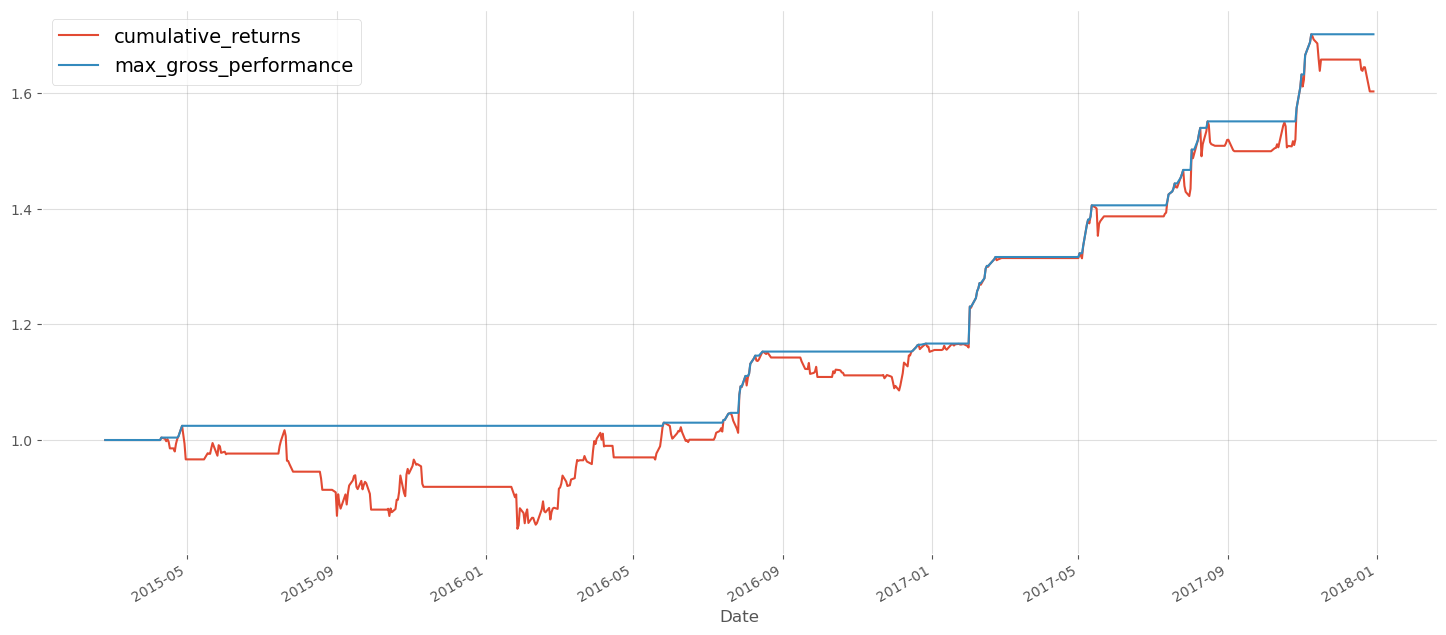

In [18]:
(
    Portfolio
    [["cumulative_returns", "max_gross_performance"]]
    .dropna()
    .plot(figsize = [18, 8]
         )
)

In [19]:
Portfolio['drawdown'] =\
    (Portfolio["max_gross_performance"]-Portfolio["cumulative_returns"])

Drawdown = pd.DataFrame(columns = ['start','end','max','duration'],
                        index = range(len(Portfolio[Portfolio['drawdown']==0])-1))

In [20]:
row=0
for i in range(len(Portfolio)) :
        for j in range(i+1,len(Portfolio)) :
            max_array = np.array([])
            if Portfolio['drawdown'][i] == 0 and Portfolio['drawdown'][j] == 0 :
                Drawdown['start'][row] = Portfolio.index[i]
                Drawdown['end'][row] = Portfolio.index[j]
                Drawdown['duration'][row] = (Drawdown['end'][row] - Drawdown['start'][row]).days
                for k in Portfolio['drawdown'].iloc[i:j+1] :
                    max_array = np.append(max_array , k)
                    Drawdown['max'][row] = max_array.max()*100
                row += 1
                break


In [21]:
Drawdown['max']

0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
        ...   
85         0.0
86    2.075285
87         0.0
88         0.0
89         0.0
Name: max, Length: 90, dtype: object

In [22]:
Drawdown.head(40)

,start,end,max,duration
0,2015-02-23 00:00:00,2015-02-24 00:00:00,0.0,1
1,2015-02-24 00:00:00,2015-02-25 00:00:00,0.0,1
2,2015-02-25 00:00:00,2015-02-26 00:00:00,0.0,1
3,2015-02-26 00:00:00,2015-02-27 00:00:00,0.0,1
4,2015-02-27 00:00:00,2015-03-02 00:00:00,0.0,3
5,2015-03-02 00:00:00,2015-03-03 00:00:00,0.0,1
6,2015-03-03 00:00:00,2015-03-04 00:00:00,0.0,1
7,2015-03-04 00:00:00,2015-03-05 00:00:00,0.0,1
8,2015-03-05 00:00:00,2015-03-06 00:00:00,0.0,1
9,2015-03-06 00:00:00,2015-03-09 00:00:00,0.0,3


In [23]:
for i in Drawdown['max'].astype('float64').nlargest(5).index :
    print(f"net drawdown = {Drawdown['max'][i]} , duration ={Drawdown['duration'][i]}days")


net drawdown = 17.796777790019814 , duration =395days
net drawdown = 6.72347586138935 , duration =123days
net drawdown = 5.267443439490305 , duration =62days
net drawdown = 5.158297189286265 , duration =73days
net drawdown = 4.903177215993271 , duration =6days


### <font color = red> Answer 3 </font>

    The Worst drawdown period    : Net drawdown ____17.79____ % | Duration __395____ Days
    
    The 2nd worst drawdown period : Net drawdown __6.72______ % | Duration __123____ Days
     
    The 3rd worst drawdown period : Net drawdown ___5.27_____ % | Duration __62____ Days
         
    The 4th worst drawdown period : Net drawdown ___5.16_____ % | Duration ___73___ Days
    
    The 5th worst drawdown period : Net drawdown ___4.90_____ % | Duration __6____ Days

### <font color = blue> 👉 Question 4</font>. Within the investment horizon, please calculate annual returns for each of the three years and then find the year that performs better than average vs. less than average annual returns.

### Below are the lines of code that lead to an answer:

In [24]:
# Extract the year information from the index in the data box
#store it in a new column named 'year' for subsequent analysis
Portfolio['year'] = Portfolio.index.year


#Create a Pandas DataFrame object Group by year,
#which contains the last 'cumulative returns' value 
Group_by_year = Portfolio.groupby('year')[['cumulative_returns']].last()

#The column value is initialized to NaN 
Group_by_year['year_returns'] = np.nan

#run a for loop here for calculating the annual return of each year. 
for i in range(len(Group_by_year)):
    if i == 0:
        Group_by_year['year_returns'].iloc[i] = (Group_by_year['cumulative_returns'].iloc[i]/1-1)*100
    else:
        Group_by_year['year_returns'].iloc[i] = \
            (Group_by_year['cumulative_returns'].iloc[i] / Group_by_year['cumulative_returns'].iloc[i - 1] - 1)*100

Group_by_year

,cumulative_returns,year_returns
year,,
2015,0.919134,-8.086572
2016,1.152385,25.377212
2017,1.602370,39.048184


In [25]:
average_annual_returns =Group_by_year['year_returns'].mean()
low_returns_years = Group_by_year[Group_by_year['year_returns'] < average_annual_returns]
high_returns_years = Group_by_year[Group_by_year['year_returns'] > average_annual_returns]

print(f"average annualreturns is {average_annual_returns}")
print(low_returns_years)
print(high_returns_years)

average annualreturns is 18.77960799381995
      cumulative_returns  year_returns
year                                  
2015            0.919134     -8.086572
      cumulative_returns  year_returns
year                                  
2016            1.152385     25.377212
2017            1.602370     39.048184


### <font color = red> Answer 4 </font>

    Below average year(s) : ___2015_________
    
    Above average year(s) : ___2016，2017_________
     

###  <font color = blue> 👉 Question 5. </font> What's the annualized Sharpe ratio of the current investment strategy?

### Below are the lines of code that lead to an answer:

In [26]:
Portfolio

,Adj Close,Positions,BUY_or_SELL,log_returns,strategy_returns,Commision_fee,cumulative_capital,cumulative_returns,max_gross_performance,drawdown,year
Date,,,,,,,,,,,
2015-02-23,29.920279,0.0,0.0,0.026668,1.00000,0,100000.000000,1.000000,1.000000,0.000000,2015
2015-02-24,29.733564,0.0,0.0,-0.006260,1.00000,0,100000.000000,1.000000,1.000000,0.000000,2015
2015-02-25,28.973181,0.0,0.0,-0.025906,1.00000,0,100000.000000,1.000000,1.000000,0.000000,2015
2015-02-26,29.339872,0.0,0.0,0.012577,1.00000,0,100000.000000,1.000000,1.000000,0.000000,2015
2015-02-27,28.898943,0.0,0.0,-0.015142,1.00000,0,100000.000000,1.000000,1.000000,0.000000,2015
...,...,...,...,...,...,...,...,...,...,...,...
2017-12-22,41.427494,1.0,0.0,0.000000,1.00000,0,164413.074066,1.644131,1.701154,0.057024,2017
2017-12-26,40.376476,0.0,-1.0,-0.025697,0.97463,5,160237.032348,1.602370,1.701154,0.098784,2017
2017-12-27,40.383583,0.0,0.0,0.000176,1.00000,0,160237.032348,1.602370,1.701154,0.098784,2017


In [27]:
Sharpe =\
(
    np.sqrt(253) * (Portfolio['cumulative_capital'] / Portfolio['cumulative_capital'].shift(1)-1).mean()\
                / (Portfolio['cumulative_capital'] / Portfolio['cumulative_capital'].shift(1)-1).std()
                    )


Sharpe

1.1641169212275102

### <font color = red> Answer 5 </font>
    
    Sharpe ratio: ___1.16_______
    

## 👇 Questions 6 to 10 ask you to answer the above questions using your `customized functions` to `scale up`.

### Below you will find the above questions repeated, but this time you need to compare the results across the following six stocks:

### `MSFT`

### `AMZN`

### `UAL`

### `DAL`

### `XOM`

### `CVX`

### <font color = green> NOTE: When answering the questions below, please hold all the conditions (i.e., investment horizon; capital base; deployment of `MACD crossover strategy`; the flat commission fee, etc.) constant, as you did above.
    
### <font color = green> That is, the `investment horizon` will be three years between 2015 and 2017; your `capital` is USD 100,000; and there is a USD 5 flat `commission fee` per trade. Given the iterative nature of the questions below, writing and using your customized functions will be helpful as you answer the questions.

###  <font color = blue> 👉 Question 6. </font>  Please visualize buy and sell positions for each of the six stocks.

### Below are the lines of code that lead to an answer:

In [28]:
tickers = ['MSFT', 'AMZN', 'UAL', 'DAL', 'XOM', 'CVX']

def get_stock(tickers):
    stock_data = {}
    for ticker in tickers:
        data = pdr.get_data_yahoo(ticker, start, end)
        stock_data[ticker] = data
    return stock_data


stock_data = get_stock(tickers)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [29]:
def get_MACD(T):
    T['short_EMA'] = T['Adj Close'].ewm(span=short, min_periods=short).mean()
    T['long_EMA'] = T['Adj Close'].ewm(span=long, min_periods=long).mean()
    T['MACD'] = T['short_EMA'] - T['long_EMA']
    T['sig_line'] = T['MACD'].ewm(span=sig, min_periods=sig).mean()
    T["Positions"] = 0.0
    T["Positions"] = np.where(T['MACD'] > T['sig_line'], 1.0, 0.0)
    T["BUY_or_SELL"] = T["Positions"].diff()

for ticker in tickers:
    get_MACD(stock_data[ticker])

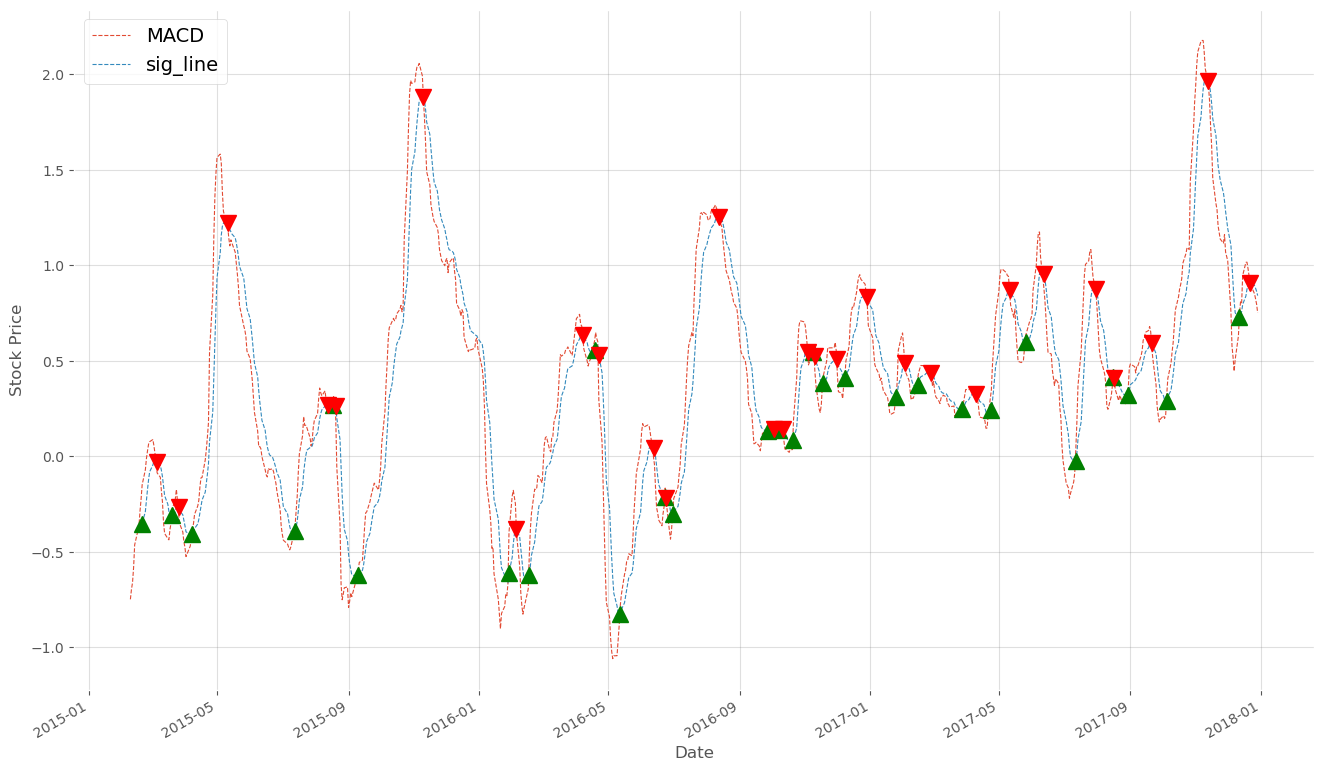

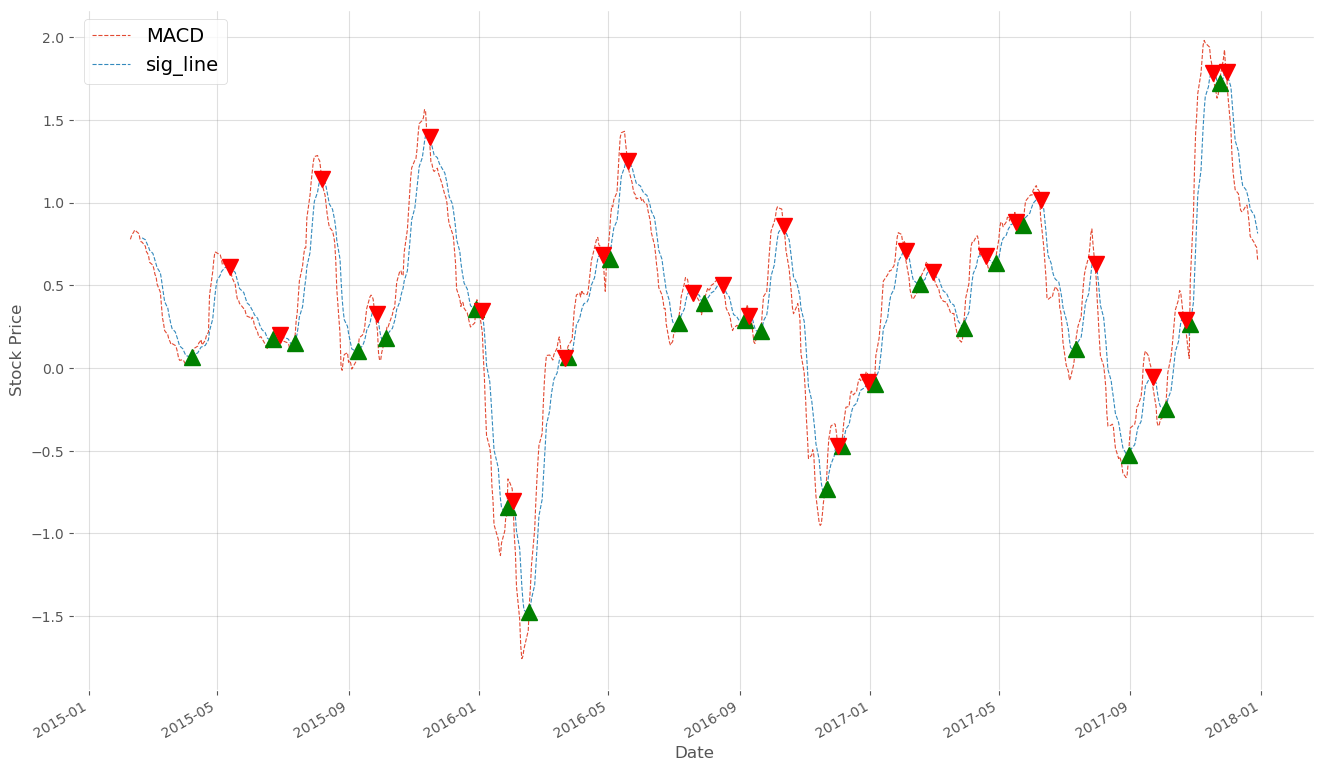

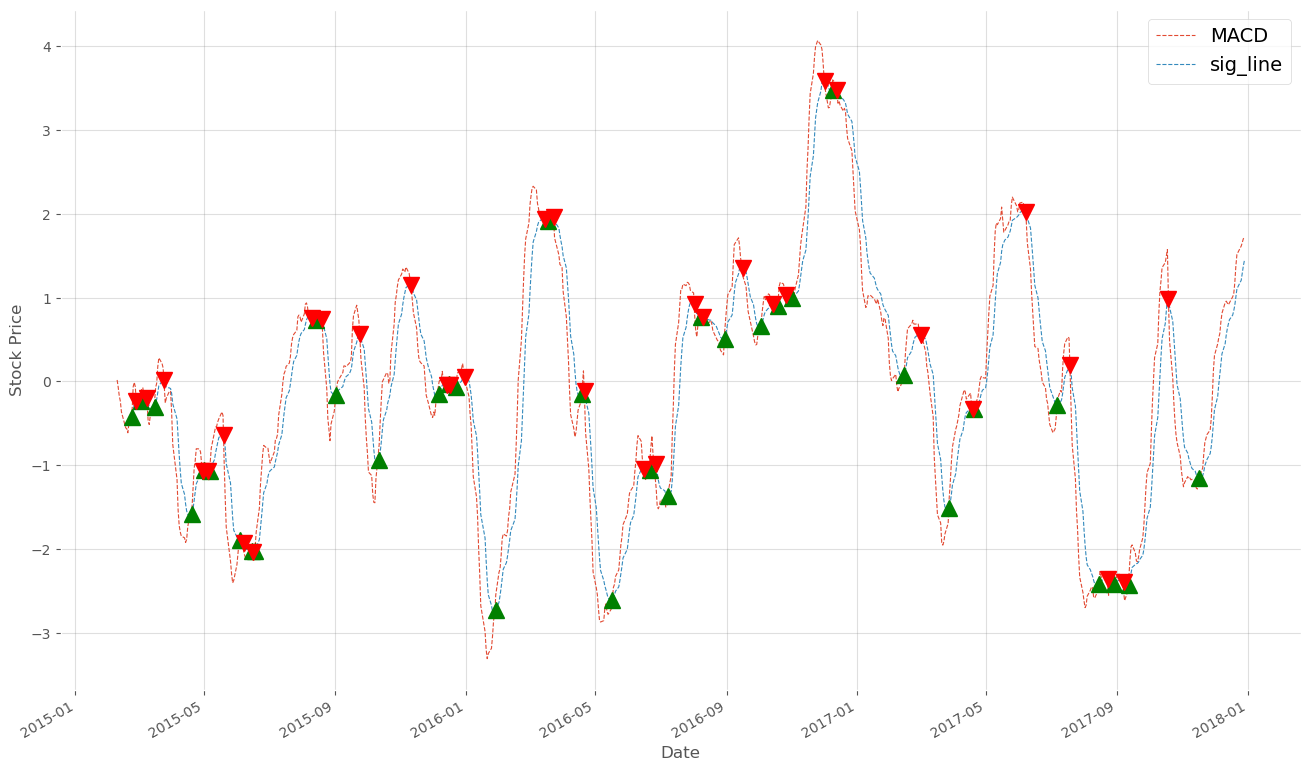

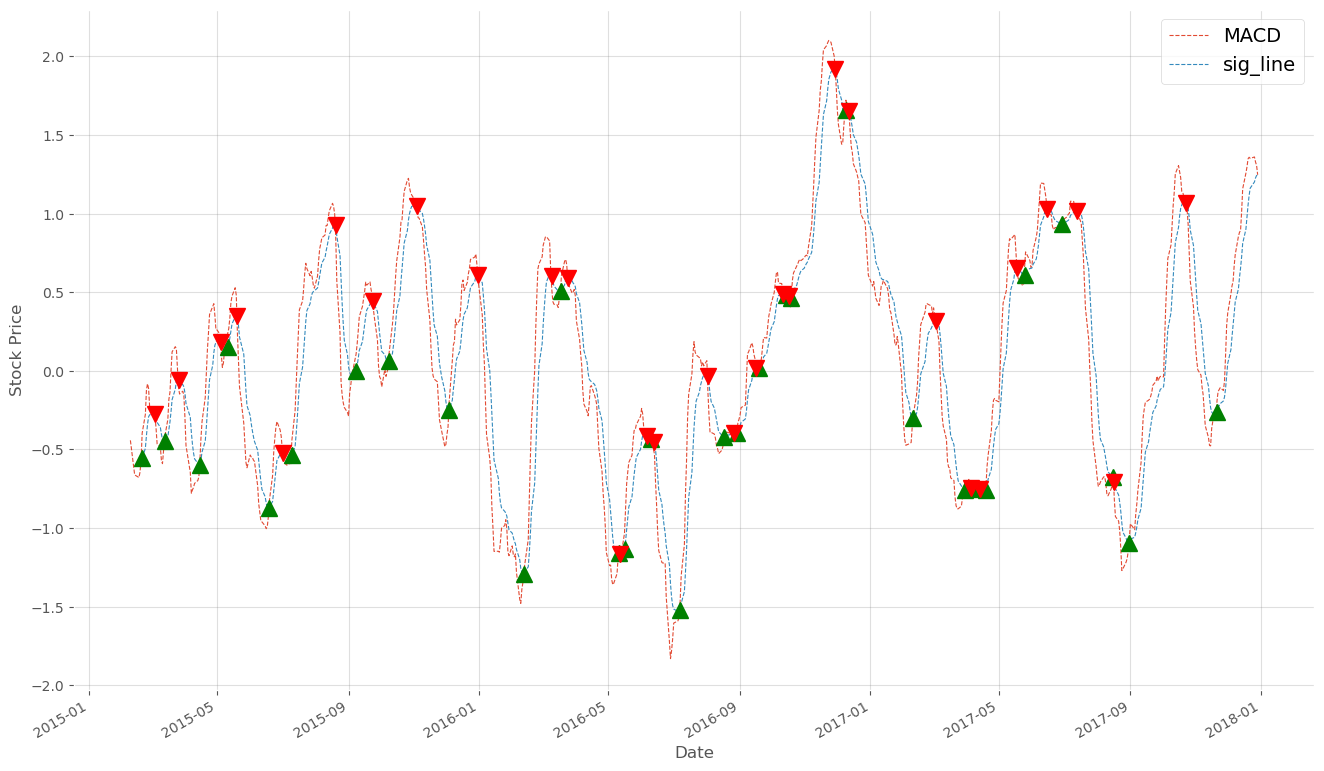

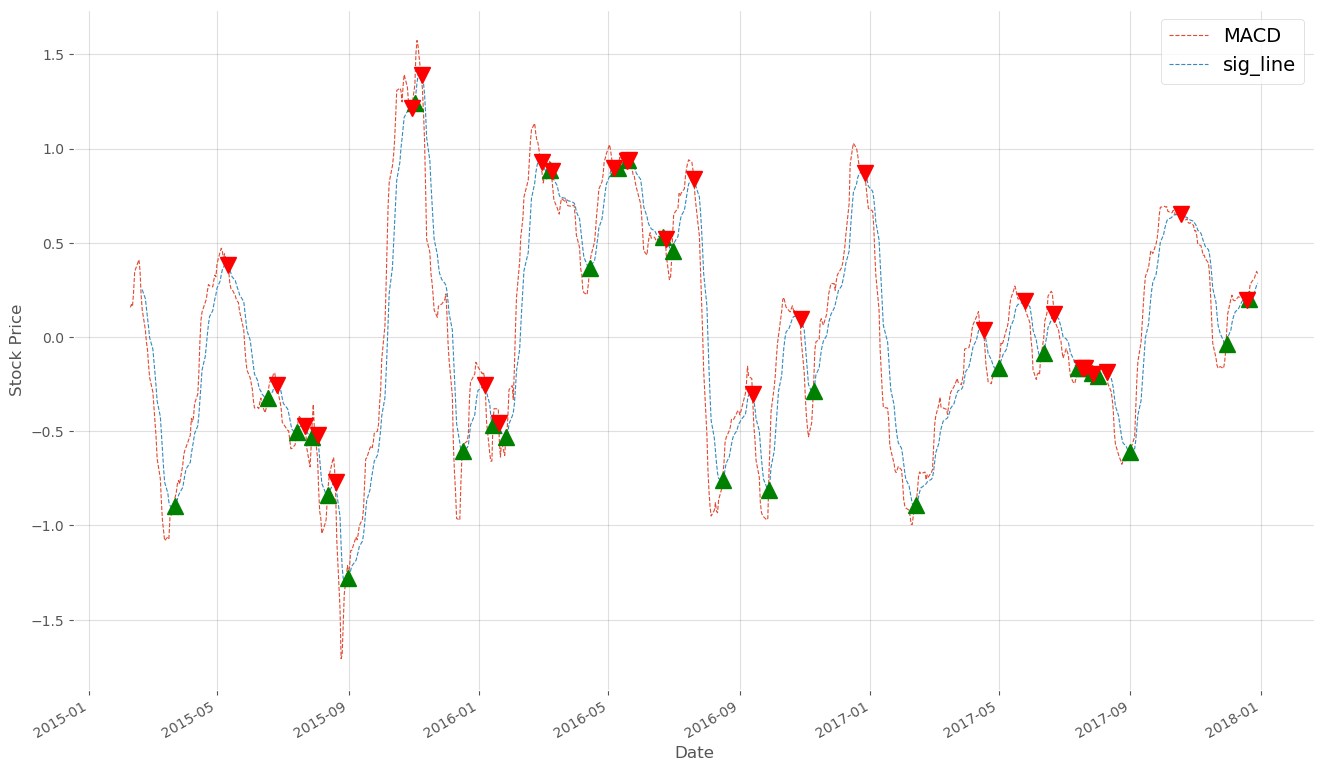

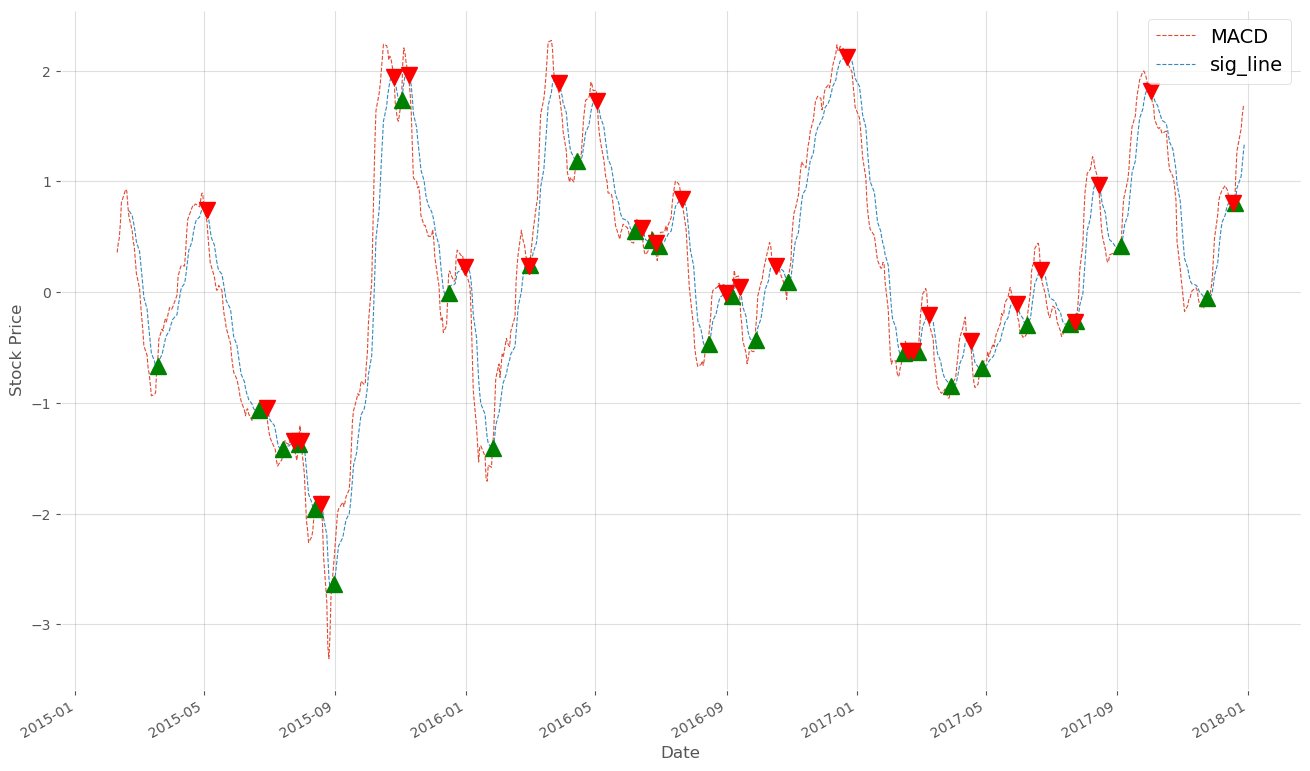

In [30]:
def visualize_macd(T):
    fig = plt.figure(figsize=[16, 10])
    sub = fig.add_subplot(111, ylabel="Stock Price")

    T[["MACD", "sig_line"]].plot(ax=sub, style=["--", "--"], lw=0.80)

    sub.plot(
        T.loc[T.BUY_or_SELL == 1.0].index,
        T.sig_line[T.BUY_or_SELL == 1.0],
        "^",
        color="green",
        markersize=12,
    )

    sub.plot(
        T.loc[T.BUY_or_SELL == -1.0].index,
        T.sig_line[T.BUY_or_SELL == -1.0],
        "v",
        color="red",
        markersize=12,
    )
for ticker in tickers:
    visualize_macd(stock_data[ticker])

### <font color = red> Answer 6 is presented in the cell below: </font>

###  <font color = blue> 👉 Question 7. </font> Which of the six stocks performs the best, based on cumulative returns?

### Below are the lines of code that lead to an answer:

In [31]:
def cumulative_macd(T, initial_capital=1e5):
    first_one_index = T['BUY_or_SELL'].eq(1).idxmax()

    T['Positions'] = np.where(T.index < first_one_index, 0, T['Positions'])
    T['log_returns'] = np.log(T['Adj Close'] / T['Adj Close'].shift(1))
    T['strategy_returns'] = (T['log_returns'] * T['Positions'].shift(1)).apply(np.exp)

    T['Commision_fee'] = np.where(T['BUY_or_SELL'] == 0, 0, 5)

    T['cumulative_capital'] = initial_capital

    for i in range(1, len(T)):
        T['cumulative_capital'].iloc[i] = (
            T['strategy_returns'].iloc[i]
            * (T['cumulative_capital'].iloc[i - 1] - T['Commision_fee'].iloc[i])
        )

    T['cumulative_returns'] = T["cumulative_capital"]/1e5
    T["max_gross_performance"] =\
(
    T
    ["cumulative_returns"]
    .cummax()
)
    return T
for ticker in tickers:
    cumulative_data = cumulative_macd(stock_data[ticker], initial_capital=1e5)
    last_cumulative_returns = cumulative_data['cumulative_returns'].iloc[-1]
    print(f"Last cumulative returns for {ticker}: {last_cumulative_returns}")


Last cumulative returns for MSFT: 1.271557947805711
Last cumulative returns for AMZN: 1.343626696063427
Last cumulative returns for UAL: 0.6780364408472553
Last cumulative returns for DAL: 1.2387044300158527
Last cumulative returns for XOM: 0.8677573263323678
Last cumulative returns for CVX: 1.1146154105533645


### <font color = red> Answer 7 </font>

    The answer is _____________AMZN_____________________________ .

###  <font color = blue> 👉 Question 8. </font> Which of the stocks displays the worst max drawdown, based on net drawdown % and the number of days?

### Below are the lines of code that lead to an answer:

In [32]:
# def max_drawdown(T):
#     T['drawdown'] = (T["max_gross_performance"] - T["cumulative_returns"]) * 100
#     return T['drawdown'].max()

# worst_max_drawdown = {}

# for ticker in tickers:
#     worst_max_drawdown[ticker] = max_drawdown(stock_data[ticker])


# for ticker, drawdown in worst_max_drawdown.items():
#     print({ticker},{drawdown})



In [33]:
def get_drawdown (T):
    #as output drawdown_df would not have continuous date index, modifications are done to portfolio_df
    #drawdowns are between peaks
    T["new_peak"]=\
        np.where(T["max_gross_performance"]==\
                 T["cumulative_returns"], 1, 0)
    #in case the last day is part of a drawdown, coerce it into a new peak
    T["new_peak"][-1]=1

    # display(T["new_peak"])

    #daily drawdown percentation
    T["dd_percentage"]=\
      (T["max_gross_performance"] - T["cumulative_returns"]) * 100


    #create new drawdown_df where index are dates with new peaks only
    drawdown=pd.DataFrame(index=T[T["new_peak"]==1].index)
    drawdown["start_date"]=drawdown.index
    drawdown["end_date"]=drawdown["start_date"].shift(-1)
    drawdown["max_percentage"]=0.0
    drawdown.dropna(inplace=True)

    #fill drawdown duration
    drawdown["duration"]=drawdown["end_date"]-drawdown["start_date"]
    drawdown.dropna(inplace=True)

    #fill max drawdown percentage based on portfolio_df information
    for i in drawdown.index:
        drawdown.at[i, "max_percentage"]=\
            T.loc[i:drawdown.loc[i, "end_date"], "dd_percentage"].max()

    return drawdown

In [34]:
for ticker in tickers:
    print(ticker, "worst drawdown based on percentage")
    display(get_drawdown(stock_data[ticker]).nlargest(3, "max_percentage"))
    # print(ticker, "worst drawdown based on duration")
    # display(get_drawdown(stock_data[ticker]).nlargest(3, "duration"))
    print("\n")

MSFT worst drawdown based on percentage


,start_date,end_date,max_percentage,duration
Date,,,,
2015-11-06,2015-11-06,2017-12-29,27.529988,784 days
2015-02-23,2015-02-23,2015-04-24,7.861672,60 days
2015-04-28,2015-04-28,2015-07-21,6.452146,84 days




AMZN worst drawdown based on percentage


,start_date,end_date,max_percentage,duration
Date,,,,
2015-11-11,2015-11-11,2017-12-29,37.592462,779 days
2015-09-21,2015-09-21,2015-10-23,11.731692,32 days
2015-04-24,2015-04-24,2015-07-17,6.820222,84 days




UAL worst drawdown based on percentage


,start_date,end_date,max_percentage,duration
Date,,,,
2015-02-24,2015-02-24,2017-12-29,49.066071,1039 days
2015-02-20,2015-02-20,2015-02-24,0.005000,4 days
2015-01-02,2015-01-02,2015-01-05,0.000000,3 days




DAL worst drawdown based on percentage


,start_date,end_date,max_percentage,duration
Date,,,,
2016-02-25,2016-02-25,2017-06-09,23.219386,470 days
2015-02-24,2015-02-24,2016-02-17,19.977699,358 days
2017-07-12,2017-07-12,2017-10-03,10.368479,83 days




XOM worst drawdown based on percentage


,start_date,end_date,max_percentage,duration
Date,,,,
2015-05-04,2015-05-04,2017-12-29,22.967046,970 days
2015-03-20,2015-03-20,2015-03-30,2.170370,10 days
2015-04-07,2015-04-07,2015-04-14,1.978123,7 days




CVX worst drawdown based on percentage


,start_date,end_date,max_percentage,duration
Date,,,,
2015-04-29,2015-04-29,2017-11-30,27.519428,946 days
2015-03-20,2015-03-20,2015-04-07,2.701541,18 days
2015-04-07,2015-04-07,2015-04-14,1.947425,7 days


In [35]:
compiled_dd=pd.concat([get_drawdown(stock_data[ticker]) for ticker in tickers], keys=tickers, names=["Company", "Date"])
compiled_dd


start_date   end_date  max_percentage duration
Company Date                                                     
MSFT    2015-01-02 2015-01-02 2015-01-05        0.000000   3 days
        2015-01-05 2015-01-05 2015-01-06        0.000000   1 days
        2015-01-06 2015-01-06 2015-01-07        0.000000   1 days
        2015-01-07 2015-01-07 2015-01-08        0.000000   1 days
        2015-01-08 2015-01-08 2015-01-09        0.000000   1 days
...                       ...        ...             ...      ...
CVX     2017-12-01 2017-12-01 2017-12-04        0.000000   3 days
        2017-12-04 2017-12-04 2017-12-21        1.178057  17 days
        2017-12-21 2017-12-21 2017-12-22        0.000000   1 days
        2017-12-22 2017-12-22 2017-12-26        0.000000   4 days
        2017-12-26 2017-12-26 2017-12-29        0.703386   3 days

[363 rows x 4 columns]

In [36]:
compiled_dd.sort_values(by="max_percentage", ascending=False).head()

,,start_date,end_date,max_percentage,duration
Company,Date,,,,
UAL,2015-02-24,2015-02-24,2017-12-29,49.066071,1039 days
AMZN,2015-11-11,2015-11-11,2017-12-29,37.592462,779 days
MSFT,2015-11-06,2015-11-06,2017-12-29,27.529988,784 days
CVX,2015-04-29,2015-04-29,2017-11-30,27.519428,946 days
DAL,2016-02-25,2016-02-25,2017-06-09,23.219386,470 days


### <font color = red> Answer 8 </font>

    The answer is ______________UAL____________________________ .

###  <font color = blue> 👉 Question 9. </font> Looking at each of the six stocks’ annual returns, which year for which stocks shows the best performance?

### Below are the lines of code that lead to an answer:

In [37]:
def annual_returns(T):
    T['year'] = T.index.year
    T_cumulative_returns = T[['year', 'cumulative_returns']]
    Group_by_year = T_cumulative_returns.groupby('year').last()
    Group_by_year['year_returns'] = np.nan
    for i in range(len(Group_by_year)):
        if i == 0:
            Group_by_year['year_returns'].iloc[i] = (Group_by_year['cumulative_returns'].iloc[i]-1)*100
        else:
            Group_by_year['year_returns'].iloc[i] = \
            (Group_by_year['cumulative_returns'].iloc[i] / Group_by_year['cumulative_returns'].iloc[i - 1] - 1)*100   
    return Group_by_year['year_returns']

for ticker in tickers:
    year_returns = annual_returns(stock_data[ticker])
    print({ticker})
    print(year_returns)

{'MSFT'}
year
2015    30.699335
2016   -12.544289
2017    11.243489
Name: year_returns, dtype: float64
{'AMZN'}
year
2015    43.337628
2016   -11.606743
2017     6.047217
Name: year_returns, dtype: float64
{'UAL'}
year
2015   -36.107624
2016     1.823238
2017     4.221447
Name: year_returns, dtype: float64
{'DAL'}
year
2015    -5.316079
2016     6.073808
2017    23.334136
Name: year_returns, dtype: float64
{'XOM'}
year
2015   -5.857162
2016   -6.532234
2017   -1.383601
Name: year_returns, dtype: float64
{'CVX'}
year
2015   -12.257207
2016    18.895561
2017     6.843461
Name: year_returns, dtype: float64


### <font color = red> Answer 9 </font>

    The answer is ______________2015 AMZN____________________________ .

###  <font color = blue> 👉 Question 10. </font> Which of the six stocks make the current strategy investment performance? Please rank the seven stocks based on their annualized Sharpe ratio.

### Below are the lines of code that lead to an answer:

In [38]:
def sharpe(T):
    sharpe_ratio =\
    np.sqrt(253) * (T['cumulative_capital'] / T['cumulative_capital'].shift(1)-1).mean() / (T['cumulative_capital'] /T['cumulative_capital'].shift(1)-1).std()
    
    return sharpe_ratio

for ticker in tickers:
    sharpe_ratio = sharpe(stock_data[ticker])
    print({ticker},{sharpe_ratio})

{'MSFT'} {0.5864613324658091}
{'AMZN'} {0.6359995307461463}
{'UAL'} {-0.3722277827339967}
{'DAL'} {0.4656586829811602}
{'XOM'} {-0.3344814578164902}
{'CVX'} {0.31567946179475964}


### <font color = red> Answer 10 </font>

    MSFT ______0.5865______
    
    AMZN ______0.636______

    UAL  ______-0.3722______

    DAL  _______0.4656_____

    XOM  ______-0.3345______
    
    CVX  ______0.3157______

### <font color="green">"💯 Thank you for putting your efforts into the exercise problem sets 😊"</font>